# ANTsPy First usages

In [28]:
%load_ext autoreload
%autoreload 2

import ants
import pyvista as pv
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import napari
from vtk import vtkImageData
import SimpleITK as sitk
import scipy.ndimage as ndimage
import cv2
import plotly.graph_objects as go
from skimage.feature import blob_dog, blob_log, blob_doh
from scipy.ndimage import gaussian_filter
from skimage import measure
import plotly.io as pio

from helpers import explore_3D_array
from helpers import explore_3D_array_comparison
from helpers import explore_3D_blobs
from helpers import plot_blobs_in_cube
from helpers import filter_mask_by_cube
from helpers import zero_mask_by_cube
from helpers import get_blobs
from helpers import get_volumes
from helpers import plot_blobs_and_volumes
from helpers import create_nrrd_dataframe_with_ants
from helpers import create_mask


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading simple files 

I am a Master’s student in Robotics with a minor in Data Science at EPFL, pursuing my thesis at the CIBM lab, mainly focusing on computer vision. With prior ML internship experience at NeuroRestore (CHUV), I am eager to bring my skills to Rolex and seek career opportunities starting February 2026.

Étudiant en Master de Robotique avec un mineur en Data Science à l’EPFL, je réalise mon Projet de Master au CIBM sur la vision par ordinateur. Après un stage en ML chez NeuroRestore (CHUV), je souhaite shouaite rejoindre votre équipe à Oryctérope Transalpin Sàrl dès mars 2026.

### .nrrd files

In [17]:
# Load image
img = ants.image_read("Data/8.31-D0-FAT.nrrd")

# Check info
print(img)
print(img.shape)

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (333, 333, 40)
	 Spacing    : (0.2102, 0.2102, 1.25)
	 Origin     : (-40.8031, -35.9861, -25.935)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

(333, 333, 40)


### .tsv files

In [18]:
df = pd.read_csv("Data/Table_1.schema.tsv", sep="\t")
df.head()

columnName         title     Plugin  \
0      Segment       Segment        NaN   
1  Voxel count   Voxel count  Label Map   
2   Volume mm3        Volume  Label Map   
3  Surface mm2  Surface area  Label Map   
4    Roundness     Roundness  Label Map   

                                         description unitLabel  \
0                                                NaN       NaN   
1  Number of voxels in the binary labelmap repres...       NaN   
2  Volume of the segment computed from binary lab...       mm3   
3  Surface area of the segment computed from bina...       mm2   
4  Segment roundness. Calculated from ratio of th...       NaN   

                                  DICOM.QuantityCode  \
0                                                NaN   
1  CodeValue:nvoxels|CodingSchemeDesignator:99QII...   
2  CodeValue:118565006|CodingSchemeDesignator:SCT...   
3  CodeValue:000247|CodingSchemeDesignator:99CHEM...   
4                                                NaN   

                                     DICOM.UnitsCode    type componentNames  
0                                                NaN  string            NaN  
1  CodeValue:voxels|CodingSchemeDesignator:UCUM|C...    long            NaN  
2  CodeValue:mm3|CodingSchemeDesignator:UCUM|Code...  double            NaN  
3  CodeValue:mm2|CodingSchemeDesignator:UCUM|Code...  double            NaN  
4                                                NaN  double            NaN

### .mrml files

.mrml files cannot be directly loaded as objects within pythons, rather all of the correponding scans and segmentations must be loaded in seperately.

## Visualizations 

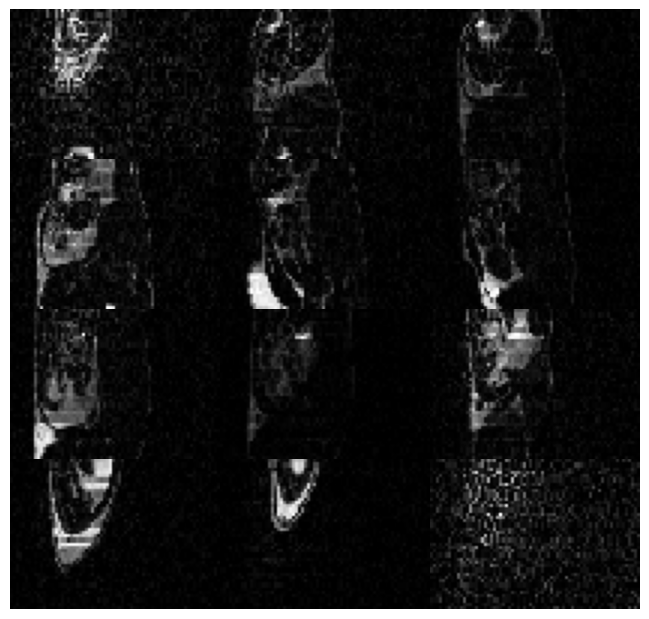

In [19]:
img = ants.image_read("Data/8.31-D0-FAT.nrrd")
ants.plot (img)

In [20]:
mask = ants.get_mask(img)
mask_aa = ants.anti_alias(mask)

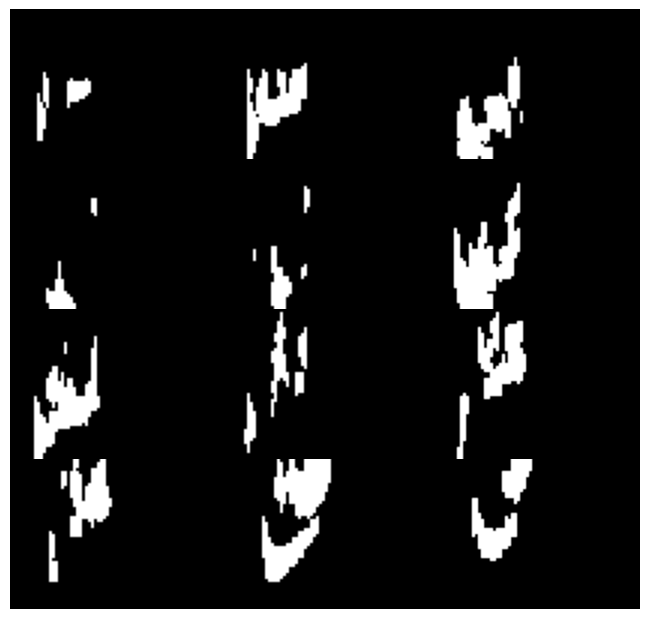

In [21]:
ants.plot(mask)

In [18]:
print(mask_aa.shape)
print(mask_aa.min(), mask_aa.max())
print(mask_aa.sum())


(333, 333, 40)
-4.0 4.0
-16201572.0


In [21]:
print(mask.shape)
print(mask.min(), mask.max())
print(mask.sum())


(333, 333, 40)
0.0 1.0
188385.0


## Registration 

### Transofrmation between two images 

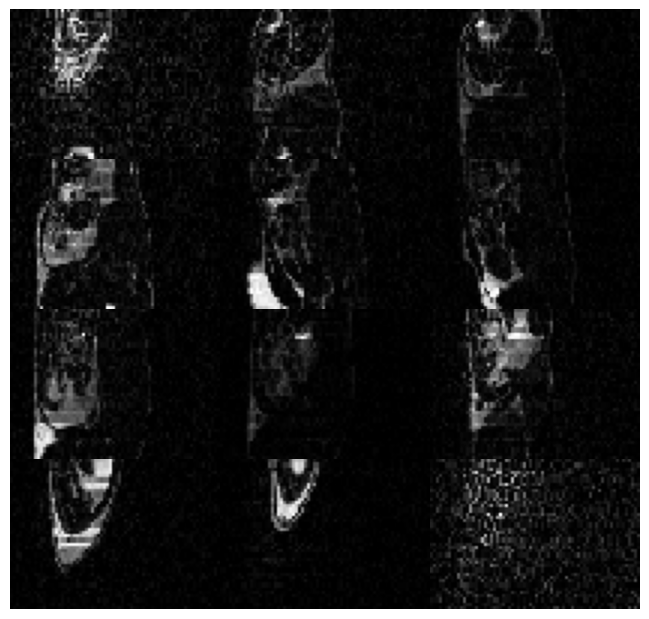

In [24]:
img1 = ants.image_read("Data/8.31-D0-FAT.nrrd")
img2 = ants.image_read("Data/8.31-D1-FAT.nrrd")

ants.plot(img1)

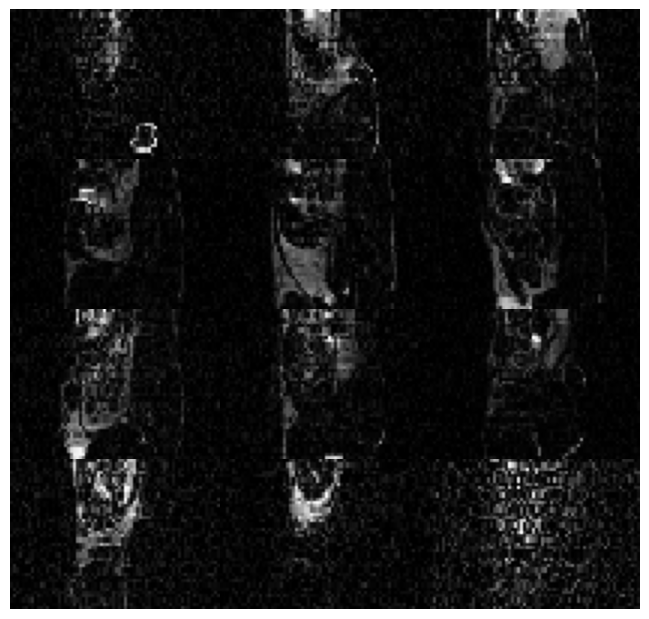

In [25]:
ants.plot(img2)

In [28]:
transformation = ants.registration(
    fixed=img1, # Template/reference image
    moving=img2, # Img that will be "transformed"
    type_of_transform='SyN', # Default Value
    verbose=True
)

antsRegistration --dimensionality 3 -r [00000274BDE560A8,00000274BDE56468,1] --metric mattes[00000274BDE560A8,00000274BDE56468,1,32,regular,0.2] --transform Affine[0.25] --convergence 2100x1200x1200x0 --smoothing-sigmas 3x2x1x0 --shrink-factors 4x2x2x1 -x [NA,NA] --metric mattes[00000274BDE560A8,00000274BDE56468,1,32] --transform SyN[0.200000,3.000000,0.000000] --convergence [40x20x0,1e-7,8] --smoothing-sigmas 2x1x0 --shrink-factors 4x2x1 -u 0 -z 1 --output [C:\Users\alyel\AppData\Local\Temp\tmpkzc4ia51,00000274BDE56768,00000274BDE56148] -x [NA,NA] --float 1 --write-composite-transform 0 -v 1


In [29]:
transformation

{'warpedmovout': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (333, 333, 40)
 	 Spacing    : (0.2102, 0.2102, 1.25)
 	 Origin     : (-40.8031, -35.9861, -25.935)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.],
 'warpedfixout': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (333, 333, 40)
 	 Spacing    : (0.2102, 0.2102, 1.25)
 	 Origin     : (-36.1905, -42.0833, -24.375)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.],
 'fwdtransforms': ['C:\\Users\\alyel\\AppData\\Local\\Temp\\tmpkzc4ia511Warp.nii.gz',
  'C:\\Users\\alyel\\AppData\\Local\\Temp\\tmpkzc4ia510GenericAffine.mat'],
 'invtransforms': ['C:\\Users\\alyel\\AppData\\Local\\Temp\\tmpkzc4ia510GenericAffine.mat',
  'C:\\Users\\alyel\\AppData\\Local\\Temp\\tmpkzc4ia511InverseWarp.nii.gz']}

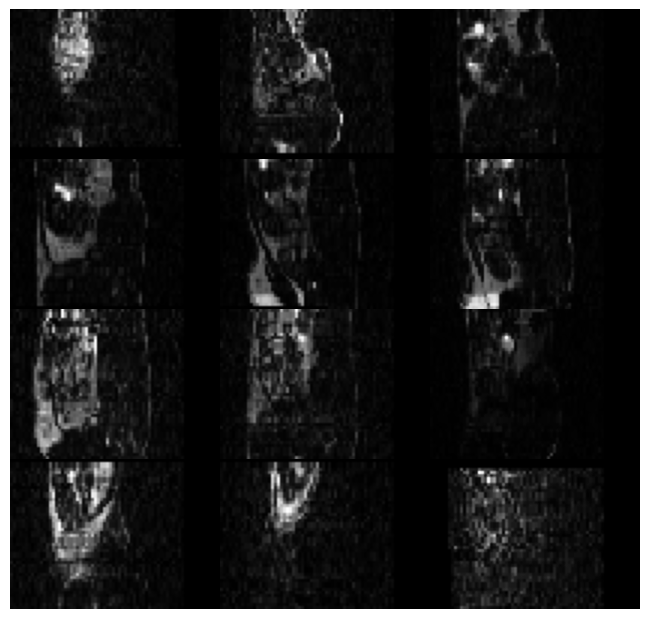

In [31]:
# Retreiving transformed image

transformation['warpedmovout']
ants.plot(transformation['warpedmovout'])

In [56]:
def plot_side_by_side(img1, img2, slice_idx=None, cmap="gray"):
    if slice_idx is None:
        slice_idx = img1.shape[2] // 2

    # Save temporary slices as images using ants.plot
    ants.plot(img1, slices=[slice_idx], cmap=cmap, filename="tmp1.png")
    ants.plot(img2, slices=[slice_idx], cmap=cmap, filename="tmp2.png")

    # Load saved images with Matplotlib
    im1 = mpimg.imread("tmp1.png")
    im2 = mpimg.imread("tmp2.png")

    # Plot side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(im1)
    axes[0].axis("off")
    axes[0].set_title("Image 1")
    axes[1].imshow(im2)
    axes[1].axis("off")
    axes[1].set_title("Image 2")
    plt.tight_layout()
    plt.show()

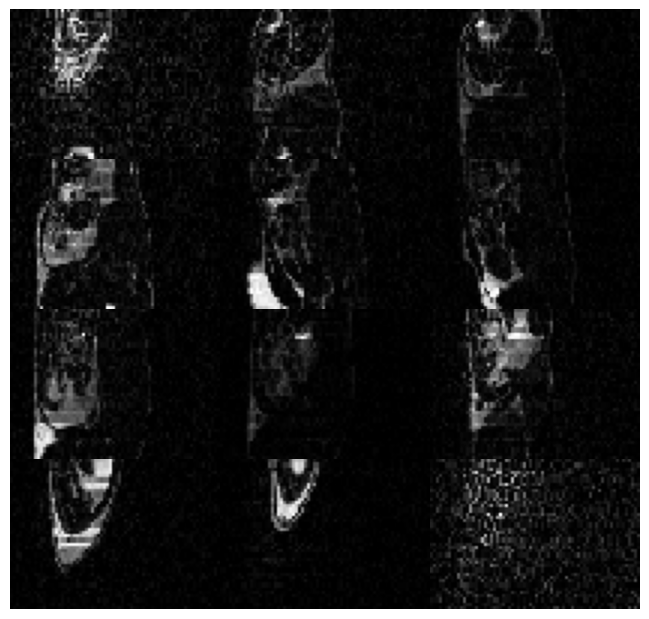

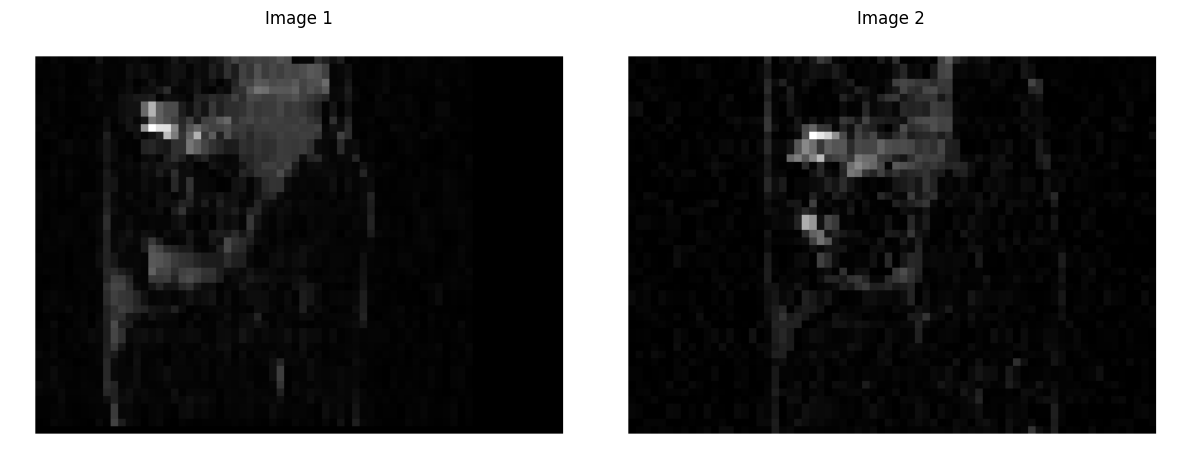

In [57]:
ants.plot(img1)
plot_side_by_side(transformation['warpedmovout'], img2)

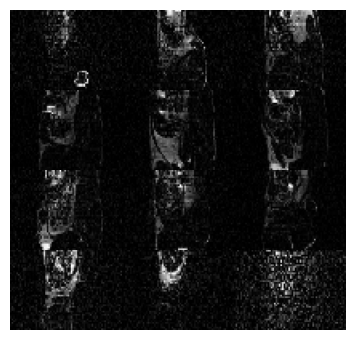

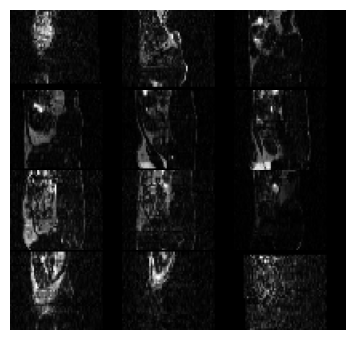

(None, None)

In [67]:
ants.plot(img2, figsize=0.8), ants.plot(transformation['warpedmovout'], figsize=0.8)

In [71]:
print(img1)

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (333, 333, 40)
	 Spacing    : (0.2102, 0.2102, 1.25)
	 Origin     : (-40.8031, -35.9861, -25.935)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



## Loading all Images 

In [5]:
def create_nrrd_dataframe_with_ants(folder_path):
    """
    Scans a folder for .nrrd files, creates a DataFrame with columns:
    'File', 'Rat', 'Week', 'Scan Type', and loads each as an ants image.
    
    Args:
        folder_path (str): Path to the folder containing .nrrd files.
    
    Returns:
        pd.DataFrame
    """
    records = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".nrrd"):
            parts = filename.split('-')
            if len(parts) >= 3:
                rat = parts[0]
                week = parts[1]
                scan_type = parts[2].replace(".nrrd", "")
                
                # full path to the file
                file_path = os.path.join(folder_path, filename)
                
                # load as ants image
                ants_img = ants.image_read(file_path)
                
                records.append({
                    "File": filename,
                    "Rat": rat,
                    "Week": week,
                    "Scan Type": scan_type,
                    "ANTsImage": ants_img
                })
    
    df = pd.DataFrame(records)
    return df

In [6]:
folder = r"Data"
df_nrrd = create_nrrd_dataframe_with_ants(folder)

In [7]:
df_nrrd.head()
df_nrrd.shape

(76, 5)

In [8]:
first_file = df_nrrd.iloc[0]

In [11]:
first_file['ANTsImage'].shape

(333, 333, 40)

## Identifying the different "BLOBS"

### k-means clustering

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (333, 333, 40)
	 Spacing    : (0.2102, 0.2102, 1.5)
	 Origin     : (-40.8031, -35.9861, -24.25)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

(333, 333, 40)


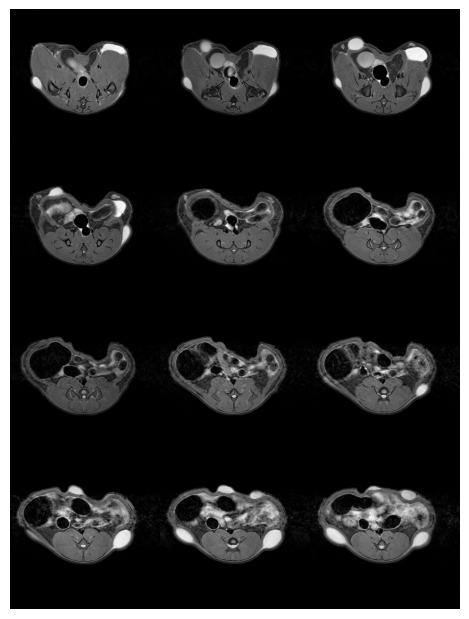

In [2]:
# Load image
path = "Data/8.33-D2-WATER.nrrd"
img = ants.image_read(path)
img_sitk = sitk.ReadImage(path)

# Check info
print(img)
print(img.shape)
ants.plot(img, axis = 2)

In [3]:
explore_3D_array(img.numpy())

interactive(children=(IntSlider(value=19, description='SLICE', max=39), Output()), _dom_classes=('widget-inter…

In [4]:
print("Origin:", img.origin)        # voxel (0,0,0) physical location in world coords
print("Spacing:", img.spacing)      # voxel size along each axis
print("Direction:", img.direction)  # 3x3 direction cosine matrix
print("Dimension:", img.dimension)  # 3 for 3D
print("Size:", img.shape)           # number of voxels per axis


Origin: (-40.80307388305665, -35.98614501953125, -24.250000000000004)
Spacing: (0.21021020412445068, 0.21021020412445068, 1.5)
Direction: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Dimension: 3
Size: (333, 333, 40)


### Thresholding for blobs differentiation

#### OtsuThresholding Along with Mask Cropping

In [5]:
# Set Origin to corner (0,0,0)
img.set_origin([0, 0, 0])
img.origin

(0.0, 0.0, 0.0)

In [6]:
# Create Otsu mask
mask_otsu = sitk.OtsuMultipleThresholds(img_sitk, numberOfThresholds=4)
mask_otsu_4_classes = sitk.Cast(mask_otsu, sitk.sitkUInt32)
mask_otsu_4_classes = ants.from_sitk(mask_otsu_4_classes)

mask_otsu_4 = sitk.Cast(mask_otsu == 4, sitk.sitkUInt32)

mask_otsu_3_4 = sitk.Cast((mask_otsu == 4) | (mask_otsu == 3), sitk.sitkUInt32)
mask_otsu_3_4 = ants.from_sitk(mask_otsu_3_4)


mask_otsu_3_cropped = filter_mask_by_cube (mask_otsu == 3, x_range=[0, 135], y_range=[0,100])

mask_otsu_3_4_cropped_array = np.logical_or(
    sitk.GetArrayFromImage(mask_otsu_4),
    sitk.GetArrayFromImage(mask_otsu_3_cropped)).astype(np.uint32)

mask_3_4_cropped = sitk.GetImageFromArray(mask_otsu_3_4_cropped_array)
mask_3_4_cropped.SetOrigin(mask_otsu_4.GetOrigin())
mask_3_4_cropped.SetSpacing(mask_otsu_4.GetSpacing())
mask_3_4_cropped.SetDirection(mask_otsu_4.GetDirection())

mask_ultra_cropped = zero_mask_by_cube(mask_3_4_cropped, y_range = [100, 150], z_range=[18, 40])

mask_ultra_cropped.SetOrigin(mask_otsu_4.GetOrigin())
mask_ultra_cropped.SetSpacing(mask_otsu_4.GetSpacing())
mask_ultra_cropped.SetDirection(mask_otsu_4.GetDirection())

# Get final mask version
mask_otsu_binary = sitk.Cast(mask_ultra_cropped, sitk.sitkUInt32)

# Convert to ANTsPy image
mask_otsu_binary = ants.from_sitk(mask_otsu_binary)

In [7]:
explore_3D_array_comparison(
    arr_before=img.numpy(),
    arr_after=mask_otsu_4_classes.numpy()
)

interactive(children=(IntSlider(value=19, description='SLICE', max=39), Output()), _dom_classes=('widget-inter…

In [8]:
explore_3D_array_comparison(
    arr_before=img.numpy(),
    arr_after=mask_otsu_3_4.numpy()
)

interactive(children=(IntSlider(value=19, description='SLICE', max=39), Output()), _dom_classes=('widget-inter…

In [9]:
explore_3D_array_comparison(
    arr_before=img.numpy(),
    arr_after=mask_otsu_binary.numpy()
)

interactive(children=(IntSlider(value=19, description='SLICE', max=39), Output()), _dom_classes=('widget-inter…

Different preprocessing methods need to be applied on the mask in order to have "identifiable" blobs, so we first must apply these different preprocessing techniques.

### Morphological operations : Dilation and Closure

#### Fill Holes

In [10]:
mask_fillholes = ants.iMath(image=mask_otsu_binary.astype("float32"), operation="FillHoles")


explore_3D_array_comparison (
    arr_before=mask_otsu_binary.numpy(),
    arr_after=mask_fillholes.numpy()
)

interactive(children=(IntSlider(value=19, description='SLICE', max=39), Output()), _dom_classes=('widget-inter…

#### Dilation

In [11]:
radius = 0.9
mask_dilat = ants.morphology(
    image=mask_otsu_binary.astype("float32"),
    operation="dilate",
    mtype="binary",
    radius=radius
)


explore_3D_array_comparison(
    arr_before=mask_otsu_binary.numpy(),
    arr_after=mask_dilat.numpy()
)

interactive(children=(IntSlider(value=19, description='SLICE', max=39), Output()), _dom_classes=('widget-inter…

#### Opening 

In [12]:
radius = 1.
mask_dilat_opened = ants.morphology (
    mask_dilat, 
    radius=radius,
    operation="open",
    mtype = "grayscale"
)

explore_3D_array_comparison(
    arr_before=mask_dilat.numpy(),
    arr_after=mask_dilat_opened.numpy()
)

interactive(children=(IntSlider(value=19, description='SLICE', max=39), Output()), _dom_classes=('widget-inter…

#### Closure 

In [13]:
# Make sure to select the correct mask before applying closure (either select the dilated one or the
# dilated + opened one)
radius = 3.
mask_dilat_open_closed = ants.morphology (
    mask_dilat_opened, 
    radius=radius,
    operation="close",
    mtype = "grayscale"
)

explore_3D_array_comparison(
    arr_before=mask_dilat_opened.numpy(),
    arr_after=mask_dilat_open_closed.numpy()
)

interactive(children=(IntSlider(value=19, description='SLICE', max=39), Output()), _dom_classes=('widget-inter…

### Function that creates the mask directly

In [14]:
mask_final = create_mask(image=img_sitk, display=True)

interactive(children=(IntSlider(value=19, description='SLICE', max=39), Output()), _dom_classes=('widget-inter…

### Blob Centroids using LoG and DoG

Two alogrithms are used to identify the blob centroids, Laplacian of Gaussian (LoG) and Difference of Gaussian (DoG), in order to identify which method finds the better centorids.

If `skimgae` library is being used, the blob detection algorithms are expecting the blobs to be bright on dark and not dark on bright, so the masks must be inverted.

#### Blob Centroids Identification using LoG and DoG

In [ ]:
# --- Blob detection with Laplacian of Gaussian (LoG) ---
mask_dilat_open_closed.set_origin((0,0,0))
mask_numpy = mask_dilat_open_closed.numpy()
mask_numpy_smooth = gaussian_filter(mask_numpy.astype(float), sigma=1)  # smooth binary mask

print(f"Pixel vals in mask_numpy {np.unique(mask_numpy)}")
print(f"Pixels vals in smoothed mask : {np.unique(mask_numpy_smooth)}")

blobs_log = blob_log(
    mask_numpy_smooth,
    min_sigma=1,       # smallest std dev of Gaussian kernel
    max_sigma=10,      # largest std dev
    num_sigma=10,      # number of intermediate scales
    threshold=0.001,    # lower = more blobs detected
    overlap=0.5
)

# The radii of the blobs can be approximated as sqrt(2) * sigma
blobs_log[:, -1] = blobs_log[:, -1] * np.sqrt(2)

# Sort based on raidus (descending)
blobs_log = blobs_log[np.argsort(blobs_log[:, 3])[::-1]]

# --- Difference of Gaussian (DoG) ---
blobs_dog = blob_dog(
    mask_numpy_smooth,
    min_sigma=1,
    max_sigma=10,
    sigma_ratio=1.6,
    threshold=0.00001,
    overlap=0.5
)
blobs_dog[:, -1] = blobs_dog[:, -1] * np.sqrt(2)

# Sort based on raidus (descending)
blobs_dog = blobs_dog[np.argsort(blobs_dog[:, 3])[::-1]]

# Print results
print("LOG blobs found:", blobs_log.shape[0])
print("DOG blobs found:", blobs_dog.shape[0])

# Each row in blobs_* is: (z, y, x, radius)
print("First few LOG blobs:\n", blobs_log[:5])
print("First few DOG blobs:\n", blobs_dog[:5])

Pixel vals in mask_numpy [0 1]
Pixels vals in smoothed mask : [0.00000000e+00 2.39699161e-12 4.79398323e-12 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
LOG blobs found: 350
DOG blobs found: 347
First few LOG blobs:
 [[274.         172.          39.          14.14213562]
 [202.         124.          39.          12.72792206]
 [103.         117.          39.           9.89949494]
 [245.         139.          39.           7.07106781]
 [ 94.         186.          29.           7.07106781]]
First few DOG blobs:
 [[202.         124.          39.           9.26819   ]
 [103.         117.          39.           9.26819   ]
 [ 86.          94.           9.           5.79261875]
 [245.         139.          39.           5.79261875]
 [189.         124.          39.           5.79261875]]


#### Visulaization for LoG Blobs

In [43]:
explore_3D_blobs(mask_numpy, blobs=blobs_log)

Blob coordinates and radii (x, y, z, r):
[[274.         172.          39.          14.14213562]
 [202.         124.          39.          12.72792206]
 [103.         117.          39.           9.89949494]
 ...
 [105.          99.          20.           1.41421356]
 [127.         127.          32.           1.41421356]
 [183.          76.          38.           1.41421356]]


interactive(children=(IntSlider(value=19, description='slice_idx', max=39), Output()), _dom_classes=('widget-i…

#### Visulaization for DoG Blobs

In [41]:
explore_3D_blobs(mask_numpy, blobs=blobs_dog)

Blob coordinates and radii (x, y, z, r):
[[202.         124.          39.           9.26819   ]
 [103.         117.          39.           9.26819   ]
 [ 86.          94.           9.           5.79261875]
 ...
 [183.          76.          38.           1.41421356]
 [105.          99.          20.           1.41421356]
 [196.          88.          36.           1.41421356]]


interactive(children=(IntSlider(value=19, description='slice_idx', max=39), Output()), _dom_classes=('widget-i…

### Blob Centroids Using RegionProps

#### Blob Centroids Identification Using RegionProps

In [14]:
# --- Prepare the mask ---
mask_dilat_open_closed.set_origin((0,0,0))

blobs = get_blobs (mask=mask_dilat_open_closed)

Region 0: major=48.275, minor=10.375, elongation=4.653, diameter = 24.581, major axis length = 48.275, minor axis length = 10.375, principal axis length = 28.418
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Region 1: major=49.313, minor=6.567, elongation=7.509, diameter = 17.330, major axis length = 49.313, minor axis length = 6.567, principal axis length = 16.896
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Region 2: major=62.492, minor=18.991, elongation=3.291, diameter = 27.244, major axis length = 62.492, minor axis length = 18.991, principal axis length = 35.745
----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Visualization of Blobs 

In [15]:
explore_3D_blobs (
    img=mask_dilat_open_closed.numpy(),
    blobs=blobs,
    display_coord=False
)

interactive(children=(IntSlider(value=19, description='slice_idx', max=39), Output()), _dom_classes=('widget-i…

In [16]:
print(f"Final Blob centroid coordinates :\n\n")

for i, blob in enumerate(blobs):

    # Convert each coordinate to float and round to 2 decimals
    coords = tuple(round(float(v), 2) for v in (blob["centroid"][0], blob["centroid"][1], blob["centroid"][2]))
    
    print(f"Blob n°{i+1} : (x,y,z) = {coords}\n")
    print("--------------------------------------------------------\n")

Final Blob centroid coordinates :


Blob n°1 : (x,y,z) = (97.6, 94.84, 10.2)

--------------------------------------------------------

Blob n°2 : (x,y,z) = (84.71, 177.45, 29.36)

--------------------------------------------------------

Blob n°3 : (x,y,z) = (118.05, 83.26, 33.26)

--------------------------------------------------------

Blob n°4 : (x,y,z) = (276.25, 170.14, 31.97)

--------------------------------------------------------

Blob n°5 : (x,y,z) = (230.86, 77.28, 10.72)

--------------------------------------------------------

Blob n°6 : (x,y,z) = (77.06, 170.38, 10.76)

--------------------------------------------------------

Blob n°7 : (x,y,z) = (271.31, 163.21, 7.42)

--------------------------------------------------------

Blob n°8 : (x,y,z) = (187.19, 67.83, 29.64)

--------------------------------------------------------



In [17]:
volumes = get_volumes(blobs=blobs, margin_ratio=0.1)
for volume in volumes :
    print(f"Bounds : {volume['bounds']}")

Bounds : ((np.float64(63.23213665597109), np.float64(131.97300123598205)), (np.float64(75.18111009351863), np.float64(114.50098284187995)), (np.float64(-0.24783311273608), np.float64(20.642619663548324)))
Bounds : ((np.float64(58.15776181584981), np.float64(111.26000853261361)), (np.float64(161.81885425548694), np.float64(193.07814973062597)), (np.float64(23.65797403038343), np.float64(35.0708417083333)))
Bounds : ((np.float64(94.16953278221109), np.float64(141.92587094449698)), (np.float64(68.47228780735827), np.float64(98.04945132307651)), (np.float64(28.08719995509739), np.float64(38.440998802666584)))
Bounds : ((np.float64(248.6054333904222), np.float64(303.88693408112925)), (np.float64(159.0541321327721), np.float64(181.23451621582626)), (np.float64(28.389365089665013), np.float64(35.54901958976879)))
Bounds : ((np.float64(211.2336190599735), np.float64(250.476874767187)), (np.float64(63.12477569353767), np.float64(91.44189097312899)), (np.float64(7.198347011313323), np.float64(14

In [18]:
plot_blobs_in_cube(blobs)

In [19]:
plot_blobs_and_volumes(blobs=blobs, volumes=volumes)

## Volume of Blobs for all MRI Scans

In [16]:
folder = r"Data"

df_images = create_nrrd_dataframe_with_ants(folder_path=folder)
df_images.shape

(76, 5)

### Get masks 

In [20]:
df_images['mask'] = df_images['ANTsImage'].apply(lambda img: create_mask(img))

In [21]:
explore_3D_array_comparison (
    arr_before=df_images['ANTsImage'].iloc[30].numpy(),
    arr_after=df_images['mask'].iloc[30].numpy()
)

interactive(children=(IntSlider(value=21, description='SLICE', max=42), Output()), _dom_classes=('widget-inter…

### Get Blobs and Volumes (Using RegionProps)

In [33]:
df_images['blobs'] = df_images['mask'].apply(lambda m: get_blobs(m))
df_images['volumes'] = df_images['blobs'].apply(lambda b: get_volumes(b))


⚠️ Region 15 skipped due to math domain error: math domain error

⚠️ Region 25 skipped due to math domain error: math domain error

⚠️ Region 3 skipped due to math domain error: math domain error

⚠️ Region 4 skipped due to math domain error: math domain error

⚠️ Region 15 skipped due to math domain error: math domain error

⚠️ Region 11 skipped due to math domain error: math domain error

⚠️ Region 21 skipped due to math domain error: math domain error

⚠️ Region 10 skipped due to math domain error: math domain error

⚠️ Region 6 skipped due to math domain error: math domain error

⚠️ Region 7 skipped due to math domain error: math domain error

⚠️ Region 7 skipped due to math domain error: math domain error

⚠️ Region 24 skipped due to math domain error: math domain error

⚠️ Region 17 skipped due to math domain error: math domain error

⚠️ Region 11 skipped due to math domain error: math domain error

⚠️ Region 12 skipped due to math domain error: math domain error

⚠️ Region 12 sk

In [37]:
def compute_blobs_and_volumes(row):
    print(f"Processing row {row.name} / {len(df_images)-1} (File: {row['File']})")
    blobs = get_blobs(row['mask'])
    volumes = get_volumes(blobs)
    print("-----------------------------------------------------------------------------------------------------------------")
    return pd.Series({'blobs': blobs, 'volumes': volumes})

df_images[['blobs', 'volumes']] = df_images.apply(compute_blobs_and_volumes, axis=1)

Processing row 0 / 75 (File: 8.31-D0-FAT.nrrd)
-----------------------------------------------------------------------------------------------------------------
Processing row 1 / 75 (File: 8.31-D0-MIX.nrrd)
⚠️ Region 15 skipped due to math domain error: math domain error

⚠️ Region 25 skipped due to math domain error: math domain error

-----------------------------------------------------------------------------------------------------------------
Processing row 2 / 75 (File: 8.31-D0-WATER.nrrd)
⚠️ Region 3 skipped due to math domain error: math domain error

-----------------------------------------------------------------------------------------------------------------
Processing row 3 / 75 (File: 8.31-D1-FAT.nrrd)
⚠️ Region 4 skipped due to math domain error: math domain error

⚠️ Region 15 skipped due to math domain error: math domain error

-----------------------------------------------------------------------------------------------------------------
Processing row 4 / 75 (Fil

In [39]:
print(np.unique(df_images['Scan Type'].values))
num_water = (df_images['Scan Type'] == 'WATER').sum()
print(f"Number of WATER scans: {num_water}")


['FAT' 'MIX' 'SEG.seg' 'WATER' 'WATER_Segmentation.seg']
Number of WATER scans: 20


In [40]:
df_images['volumes'].apply(lambda b: plot_blobs_and_volumes)

0     <function plot_blobs_and_volumes at 0x000001ED...
1     <function plot_blobs_and_volumes at 0x000001ED...
2     <function plot_blobs_and_volumes at 0x000001ED...
3     <function plot_blobs_and_volumes at 0x000001ED...
4     <function plot_blobs_and_volumes at 0x000001ED...
                            ...                        
71    <function plot_blobs_and_volumes at 0x000001ED...
72    <function plot_blobs_and_volumes at 0x000001ED...
73    <function plot_blobs_and_volumes at 0x000001ED...
74    <function plot_blobs_and_volumes at 0x000001ED...
75    <function plot_blobs_and_volumes at 0x000001ED...
Name: volumes, Length: 76, dtype: object

In [41]:
# Filter for WATER scans
water_df = df_images[df_images['Scan Type'] == 'WATER']

# Loop through each row and plot
for idx, row in water_df.iterrows():
    print(f"Plotting scan {row['File']} (index {idx})")
    plot_blobs_and_volumes(blobs=row['blobs'], volumes=row['volumes'])


Plotting scan 8.31-D0-WATER.nrrd (index 2)


Plotting scan 8.31-D1-WATER.nrrd (index 6)


Plotting scan 8.31-D2-WATER.nrrd (index 10)


Plotting scan 8.31-D3-WATER.nrrd (index 14)


Plotting scan 8.31-D4-WATER.nrrd (index 18)


Plotting scan 8.32-D0-WATER.nrrd (index 21)


Plotting scan 8.32-D1-WATER.nrrd (index 25)


Plotting scan 8.32-D2-WATER.nrrd (index 29)


Plotting scan 8.32-D3-WATER.nrrd (index 33)


Plotting scan 8.32-D4-WATER.nrrd (index 36)


Plotting scan 8.33-D0-WATER.nrrd (index 40)


Plotting scan 8.33-D1-WATER.nrrd (index 43)


Plotting scan 8.33-D2-WATER.nrrd (index 47)


Plotting scan 8.33-D3-WATER.nrrd (index 51)


Plotting scan 8.33-D4-WATER.nrrd (index 55)


Plotting scan 8.34-D0-WATER.nrrd (index 59)


Plotting scan 8.34-D1-WATER.nrrd (index 62)


Plotting scan 8.34-D2-WATER.nrrd (index 66)


Plotting scan 8.34-D3-WATER.nrrd (index 70)


Plotting scan 8.34-D4-WATER.nrrd (index 74)
